# 3 - Matrices, Optimal Portfolios

Espen Sirnes  
2024-09-18

This lecture explores the strategic behavior of an investor in the stock
market, particularly under the assumption of risk aversion, as discussed
in the previous note on utility theory. Risk lovers generally prefer the
most risky assets, while risk-neutral investors opt for assets with the
highest returns. In contrast, a risk-averse investor seeks to maximize
returns without disproportionately increasing volatility, typically
measured as variance.

# Matrices

To calculate optimal portfolios for any number of assets, a basic
understanding of matrix algebra (Cayley 1858) is essential. Matrix
algebra simplifies the resolution of several equations simultaneously, a
process that becomes increasingly complex with the addition of
variables. Using matrix functions in software like Excel and various
statistical packages allows us to solve systems of equations efficiently
without manually computing each one.

Matrices not only streamline the computation but also simplify notation,
making the formulation of equations for optimal portfolios more
manageable.

A matrix is a structured array of numbers arranged in rows and columns,
essentially a set of vectors. Here’s an example of a vector:

In [1]:
import numpy as np
np.random.randint(0,100,3)

array([18, 68, 68])

Combining several vectors side-by-side forms a matrix:

In [2]:
np.random.randint(0,100,(2,3))

array([[88, 63, 85],
       [14, 37, 60]])

This format is sometimes denoted as $\mathbf{X}_{N \times K}$ to
indicate the number of rows ($N$) and columns ($K$).

# Algebra with Matrices

Matrix algebra operates under similar principles to ordinary
algebra—allowing addition, subtraction, multiplication, and division
(through inversion)—but it also requires adherence to specific rules.

## Matrix Multiplication

The core operation in matrix algebra is matrix multiplication, which
combines elements from the rows of the first matrix with the columns of
the second. For example, multiplying a $2 \times 3$ matrix by a
$3 \times 2$ matrix yields:

In [3]:
X = np.random.randint(0,5,(2,3))
Y = np.random.randint(0,5,(3,2))
result = X @ Y
print(X)
print(Y)
print(result)

[[4 4 1]
 [0 0 2]]
[[2 3]
 [2 2]
 [4 3]]
[[20 23]
 [ 8  6]]

What happens is that we sum the product of the elements in each row of
the first matrix and each column of the second. You can for example
check that element \[0,0\] of the result is the sum of the product of
the first row of the first matrix, and the first column of the second.
An easy way to remember this is to think of the multiplication of
$A \times B$ is to follow the lines of the letters: ![multiplication
rule](attachment:img/multrule.png "Muliplication rule")

Due to the rules for matrix multiplication, it requires the number of
columns in the first matrix to match the number of rows in the second.

The matrix multiplication is different from the normal multiplication in
Python. Normal multiplicaiton can be done with the normal multiplication
operator `*`. It will then multiply each element in X with the
corresponding element of Y, and both matrices must be of the same size:
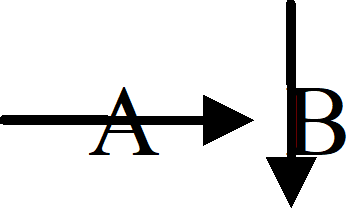

In [4]:
X = np.random.randint(0,5,(2,3))
Y = np.random.randint(0,5,(2,3))
result = X*Y
print(X)
print(Y)
print(result)

[[0 0 0]
 [3 2 4]]
[[4 2 3]
 [0 1 0]]
[[0 0 0]
 [0 2 0]]

The reason for using the former method, is that the former is required
for solving sets of equations.

## Adding and Subtracting Matrices

Adding or subtracting matrices is straightforward; simply add or
subtract corresponding elements. In Python, the multiplication requires
numpy function, but if the matrices are numpy variables, subtraction and
addition can be done with the normal operators.

In [5]:
import numpy as np

X = np.random.randint(0,100,(2,2))
Y = np.random.randint(0,100,(2,2))

# Addition of matrices
print(f"X:\n{X}")
print(f"Y:\n{Y}")
print(f"X+Y:\n{X+Y}")

X:
[[27 80]
 [28 70]]
Y:
[[22 81]
 [23 67]]
X+Y:
[[ 49 161]
 [ 51 137]]

## Dividing with a Matrix

While direct division isn’t defined in matrix operations, we can achieve
a similar result by multiplying by the inverse of a matrix. The inverse
of a matrix $\mathbf{X}$, denoted $\mathbf{X}^{-1}$, satisfies:

<span id="eq-matrix_example">$$
\mathbf{X} \times \mathbf{X}^{-1} = \mathbf{I} =
\begin{pmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{pmatrix}
 \qquad(1)$$</span>

where $\mathbf{I}$ is the identity matrix. Multiplying any matrix by
$\mathbf{I}$ results in the original matrix, akin to multiplying any
number by 1.

In practice, while the concept is straightforward, the actual
calculation of a matrix inverse can become complex for larger matrices
and is typically handled by computers. We will not go through the method
of obtaining the inverse in this course, we will in stead just utilize
the numpy funciton for calculating the inverse. Specifically, we use
`np.linalg.inv(X)`. We can check that it actually complies with the
definition like this:

In [6]:
X = np.random.randint(0,10,(3,3))
# Calculating inverse of X
X_inv = np.linalg.inv(X)

# Testing
np.round(X_inv @ X,1)

## Solving Equations with Matrix Algebra

The foundation we’ve established for matrix algebra now allows us to
efficiently solve systems of equations. Consider solving the following
pair of simultaneous equations:

<span id="eq-equation_system">$$
x_{11}a_{1} + x_{12}a_{2} = b_{1} \\
x_{21}a_{1} + x_{22}a_{2} = b_{2}
 \qquad(2)$$</span>

Here, we know the values of $x$ and $b$ but need to find the values of
$a$. These equations can be succinctly expressed using matrix notation:

<span id="eq-Xab">$$
\mathbf{X \times a} = \mathbf{b}
 \qquad(3)$$</span>

where $\mathbf{a}$ and $\mathbf{b}$ are column vectors. Let us define
the right hand side vector `b` and the coeficient matrix `X` randomly in
python as

In [7]:
b =  np.random.randint(0,100,(2,1))
# Define matrix X
X =  np.random.randint(0,100,(2,2))
print(X)
print(b)

[[54 23]
 [75 42]]
[[77]
 [65]]

To solve for $\mathbf{a}$, we use the inverse of $\mathbf{X}$, provided
it exists, and multiplies it with the left and right hand sides of the
equation, just as we would divide with X on both sides to solve for a
single equation:

<span id="eq-matrix_inverse">$$
\mathbf{X}^{-1} \times \mathbf{X} \times \mathbf{a} = \mathbf{X}^{-1}\mathbf{b}
 \qquad(4)$$</span>

Since we know that $\mathbf{X}^{-1}$ is the solution to
$\mathbf{X}^{-1} \times \mathbf{X} = \mathbf{I}$, premultiplying with
$\mathbf{X}^{-1}$ yields:

<span id="eq-matrix_inversion">$$
\mathbf{a} = \mathbf{X}^{-1}\mathbf{b}
 \qquad(5)$$</span>

Hence, we have found an easy way to solve any linear equation. We can
test that it works in python. Let us first find `a` using this approach:

In [8]:
a = np.linalg.inv(X) @ b
a

array([[ 3.20257827],
       [-4.17127072]])

If you get a “Singular matrix” error its because we are generating `X`
with a few random integers, which sometimes creates unsolvable systems,
so just generate `X` and `b` again.

Now we can test, if the solution for a actually works, by applying it on
the original equation $\mathbf{X \times a} = \mathbf{b}$. This should
yield the right hand side of th equation, `b`:

In [9]:
X @ a

array([[77.],
       [65.]])

Compare this with the actual `b`:

In [10]:
b

array([[77],
       [65]])

Thus, we have identified an effective method to solve any system of
equations, provided that $\mathbf{X}$ is invertible. If $\mathbf{X}$
cannot be inverted, it indicates that two or more equations are
essentially identical, leading to an “underdetermined” system. In such
cases, some equations are redundant, and there are not enough
independent equations to determine the values of all variables. Remember
the fundamental rule: we need an equal number of equations and unknowns
to uniquely solve for each variable.

## Transposing

Transposing a matrix involves swapping its rows and columns. For
example, a $2 \times 3$ matrix:

<span id="eq-matrix_2x3">$$
\mathbf{X}_{2 \times 3} =
\begin{pmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23}
\end{pmatrix}
 \qquad(6)$$</span>

transposes to:

<span id="eq-matrix_3x2">$$
\mathbf{X}_{2 \times 3}^{\prime} =
\begin{pmatrix}
x_{11} & x_{21} \\
x_{12} & x_{22} \\
x_{13} & x_{23}
\end{pmatrix}
 \qquad(7)$$</span>

where $^{\prime}$ denotes the transposed matrix. For a column vector
$\mathbf{a}$, transposing and then multiplying by itself,
$\mathbf{a}^{\prime}\mathbf{a}$, calculates the sum of squares of its
components.

In [11]:
# Example of matrix transposition
X_2x3 = np.random.randint(0,100,(2,3))
X_transposed = X_2x3.T
X_transposed

array([[52, 29],
       [ 8,  3],
       [17, 40]])

Transposition is often used to conform to the requirements of matrix
multiplication, where the number of columns in the first matrix must
match the number of rows in the second. If this is not the case, one
might transpose the first matrix to facilitate multiplication.

# Calculus and matrices

Deriving matrices follows similar principles to deriving polynomials
(Cayley 1858). For instance:

<span id="eq-scalar_deriv">$$
\frac{d\left( a^{2} \sigma^{2} \right)}{da} = 2a \sigma^{2}
 \qquad(8)$$</span>

applies to scalar variables, and for a matrix $\Sigma$ and a column
vector $\mathbf{a}$, we have:

<span id="eq-matrix_deriv">$$
\frac{d\left(\mathbf{a}^{\prime}{\Sigma}\mathbf{a}\right)}{d\mathbf{a}^{\prime}} =2{\Sigma}\mathbf{a}
 \qquad(9)$$</span>

assuming ${\Sigma}$ is symmetric. In practical terms, the derivative
with respect to `a` here, given some values for `a`, is

In [12]:
# Derivation with matrix and vector
a = np.random.randint(0,100,(2,1))
Sigma = np.random.randint(0,100,(2,2))

# Derivative of a' Sigma a with respect to a
derivative = 2 * Sigma @ a
derivative

array([[21312],
       [14958]])

We can rewrite the matrix formulation in scalar form, to check that the
rule is correct. The scalar form of
$\mathbf{a}^{\prime} {\Sigma}\mathbf{a}$ is

<span id="eq-matrix_vec_matr_vec_prod">$$
\mathbf{a}^{\prime} {\Sigma} \mathbf{a} = \sum_{j=0}^{N} a_j \left( \sum_{i=0}^{N} a_i \sigma_{ij} \right)
 \qquad(10)$$</span>

You can verify that

<span id="eq-matrix_vec_matr_vec_prod_long">$$
\frac{d(\mathbf{a}^{\prime} {\Sigma} \mathbf{a}) }{d\mathbf{a}}= 2 [\sum_{i=0}^{N} a_i \sigma_{i0}, ..., \sum_{i=0}^{N} a_i \sigma_{iN}]
 \qquad(11)$$</span>

# Optimal portfolios with more than one asset

We remember from above the previous chapter that with one asset, the
optimal portfolio was

<span id="eq-opt_port">$$
a_{opt}=\frac{(\mu -r)}{\lambda \sigma^2}
 \qquad(12)$$</span>

From this we concluded that:

1.  The more risk-averse the person is, the less they should invest.
2.  The larger the expected return of the asset, the more should be
    invested.
3.  The greater the risk associated with the asset, represented by
    $\sigma^2$, the less should be invested.

Now, let us consider the optimal investments if we have more than one
asset, as developed by Markowitz (1952).

## Optimal Portfolios with Any Number of Assets

Let us now assume that the investor in the previous section has a
portfolio of $N$ assets, not just one. Their wealth next period,
assuming the entire amount is borrowed, is then expressed in matrix
notation as:

<span id="eq-opt_port">$$
W_1 = \mathbf{a}'\mathbf{x} - \mathbf{1}r
 \qquad(13)$$</span>

where $\mathbf{a}$ represents the portfolio weights, $\mathbf{x}$
represents the returns, and $\mathbf{1}$ is a column vector of ones,
such that $\mathbf{1}r$ is a column vector of the risk-free interest
rate $r$. Recall from earlier that the investor aims to maximize the
difference between expected return and variance:

<span id="eq-opt_port_max_prob">$$
\max_{\mathbf{a}} Z = \mathbb{E}W_1 - \lambda \frac{1}{2} \operatorname{var}(W_1)  
 \qquad(14)$$</span>

$\mathbf{x}$ now is a column vector of many normally distributed
variables with different variances and expectations. We denote the
expected returns by $\mu_i$ for asset $i$, and the associated vector of
these returns by $\mathbf{\mu}$. Given a portfolio $\mathbf{a}$, the
expected return on the portfolio then becomes:

<span id="eq-opt_port_FOC">$$
\mathbb{E}W_1 = \mathbf{a}^{\prime}(\mathbb{E}\mathbf{x}-\mathbf{1}r) = \mathbf{a}^{\prime}({\mu} - \mathbf{1}r)
 \qquad(15)$$</span>

For the variance, the risk free return $r$ is not relevant, since means
are subtracted anyway. We define the covariance matrix, all the
combinations of variance and covariance between the stocks as

<span id="eq-covar_matrix">$$
\operatorname{var}W_1 =  \mathbf{a}^{\prime}{\Sigma} \mathbf{a} = 
\mathbf{a}^{\prime}
\begin{bmatrix}
\sigma_00 & \sigma_12 & \cdots & \sigma_1N \\
\sigma_12 & \sigma_22 & \cdots & \vdots \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_1N & \cdots & \cdots & \sigma_{NN}
\end{bmatrix}
\mathbf{a}
 \qquad(16)$$</span>

Where $\sigma_{ij}$ is the covariance between $i$ and $j$, and
$\sigma_i^2$ is the variance of asset $i$. This is the covariance
matrix, denoted by the capital sigma, ${\Sigma}$.

When a vector is normally distributed we write it as
$\mathbf{x} \sim N({\mu}, {\Sigma})$.

We have now derived expressions for $\mathbb{E}(W_1)$ and
$\operatorname{var}(W_1)$ using matrix notation. Building on the
concepts from the previous lecture, we can now formulate our portfolio
optimization problem as:

<span id="eq-opt_port_max_problem">$$
\max_{\mathbf{a}} Z = \mathbf{a}^{\prime}({\mu} - \mathbf{1}r) - \lambda \frac{1}{2} \mathbf{a}^{\prime}{\Sigma}\mathbf{a}
 \qquad(17)$$</span>

Taking the derivative with respect to $\mathbf{a}^{\prime}$ yields the
$N$ first order conditions:

<span id="eq-opt_port_FOC">$$
\frac{dZ}{d\mathbf{a}} = ({\mu} - \mathbf{1}r) - \lambda {\Sigma a} = 0
 \qquad(18)$$</span>

Hence, in optimum:

<span id="eq-opt_port_FOC2">$$
{\Sigma} \mathbf{a}= \frac{1}{\lambda}({\mu} - \mathbf{1}r)
 \qquad(19)$$</span>

By premultiplying with the inverse of ${\Sigma}$, we obtain the optimal
portfolio:

<span id="eq-opt_port_sol">$$
\mathbf{a_{opt}} = \frac{1}{\lambda} {\Sigma}^{-1}({\mu} - \mathbf{1}r)
 \qquad(20)$$</span>

Note that this formula looks very similar to the formula for an optimal
portfolio with only one asset:

<span id="eq-opt_port_scalar">$$
a_{opt} = \frac{\mu - r}{\lambda \sigma^2}
 \qquad(21)$$</span>

In general, we may draw the same conclusions as in the case of one
asset:

1.  The more risk-averse the person is (large $\lambda$), the less they
    should invest.
2.  The larger the expected return the asset has, the more should be
    invested.
3.  The more risk is associated with the asset, the less should be
    invested.

# Empirical example - optimal porfolio and the portfolio front

We will now create an optimal portfolio using data from Titlon, and draw
the “portfolio front” (Markowitz 1952). The portfolio front are the
smallest possible volatility of a set of assets, for all return leves.
We use the script feature of Titlon to fetch the data, and storing it in
`'output/stocks.df'`

In [13]:
import pandas as pd
import os
#Query script for MySQL client
import pymysql
con = pymysql.connect(host='titlon.uit.no', 
                    user="user@name.com", 
                    password="passwordfromtitlon", 
                    database='OSE')  
crsr=con.cursor()
crsr.execute("SET SESSION MAX_EXECUTION_TIME=60000;")
crsr.execute("""
    SELECT  * FROM `OSE`.`equity` 
    WHERE year(`Date`) >= 2016
    ORDER BY `Name`,`Date`
""")
r=crsr.fetchall()
df=pd.DataFrame(list(r), 
            columns=[i[0] for i in crsr.description])
df



#YOU NEED TO BE CONNECTED TO YOUR INSTITUTION VIA VPN,
# OR BE AT THE INSTITUTION, FOR THIS CODE TO WORK

os.makedirs('output', exist_ok=True)
pd.to_pickle(df,'output/stocks.df')

We now reload the data, and pick the four stocks  
1. has been traded at the first and last day of the sample 2. that are
most traded (sorted on sum of `Turnover`)

We can obtain that with this code:

In [14]:
import numpy as np
import pandas as pd

df = pd.read_pickle('output/stocks.df')
# Defining annual risk free rate. 
rf = df['NOWA_DayLnrate'].mean()*7

# Identifying the ISINs with dates both at the beginning
# and the end of the data set
isin_with_first_date = (
    df[df['Date'] == df['Date'].min()]['ISIN'].unique()
    )
isin_with_last_date = (
    df[df['Date'] == df['Date'].max()]['ISIN'].unique()
    )

valid_isins = (
    set(isin_with_first_date)
    .intersection(isin_with_last_date)
    )


df = df[df['ISIN'].isin(valid_isins)]

# creating a new column - the combination of Name and ISIN
df['Name (ISIN)'] = (
    df['Name'].str.upper().str.strip() + '(' + df['ISIN'] + ')'
    )

# keeping only the most traded shares
res = (
        df.groupby(['Name (ISIN)'])
        .agg({'Turnover': 'sum'})
        .sort_values(by='Turnover', ascending=False)
)
df = df.merge(res.head(4), on=['Name (ISIN)'], 
                                how='inner')
res.head(4)

## The historic mean and covariance matrix

We will now calculate the covariance matrix and the mean vector. To
begin, we’ll create a function that reformats the data from its long
format (where stock prices are listed sequentially in a single column)
to a wide format. In this wide format, unique dates will be in the first
column, with subsequent columns containing prices for each stock.

In [15]:
def get_matrix(df, field):
    """Converts the df to a matrix df that can 
    be used to calculate the covariance matrix"""
    
    import pandas as pd
    df['Date'] = pd.to_datetime(df['Date'])
    df_unique = df.drop_duplicates(
                        subset=['Date', 'ISIN'])

    pivot_df = df_unique.pivot(index='Date', 
                                columns='Symbol', 
                                values=field)

    pivot_df = pivot_df.dropna()

    # Annualized weekly returns
    df_weekly = pivot_df.resample('W').sum()

    return df_weekly

#X is a matrxi with e
X_df = get_matrix(df, 'lnDeltaP') 
X_df = X_df.sort_index()

X_df

431 rows × 4 columns

Wit this data, it is relatively easy to calculate covariance and the
means vector

In [16]:
# Converting X to a numpy array:
X = np.array(X_df)

# Calculating the covariance
cov_matrix = np.cov(X, rowvar=False)

# Calculating the means vector, and reshaping it to a 
# column vector. 

means = np.mean(X, axis=0).reshape((X.shape[1],1))

## Plotting the portfolio front

We now turn to portfolio front. The portfolio front represents the
volatility of the portfolio with the least variance, for a given
portfolio return. Hence, we want a function of portfolio return that
represent the minimum variance portfolios.

It turns out that by defining a few simple scalars, there is a
reasonably simple expression for the set of minimum variance portfolios.
The scalars are:

<span id="eq-opt_port_A">$$
A = \mathbf{1}^{\prime}{\Sigma}^{-1}\mathbf{1}
 \qquad(22)$$</span>

<span id="eq-opt_port_B">$$
B = \mathbf{1}^{\prime}{\Sigma}^{-1}{\mu-\mathbf{1}r}
 \qquad(23)$$</span>

<span id="eq-opt_port_C">$$
C = {\mu-\mathbf{1}r}^{\prime}{\Sigma}^{-1}{\mu-\mathbf{1}r}
 \qquad(24)$$</span>

With these definition, the portfolio front, representing all minimum
variance portfolios for a given expected return and a total investment
of 1, is

<span id="eq-opt_port_front">$$
{\sigma}_{opt} =\frac{1}{A}+\frac{ \left(\mu_{opt}-\frac{B}{A}\right)^2}{C-\frac{B^2}{A}} 
 \qquad(25)$$</span>

where $\mu_{opt}={\mu}^{\prime}\mathbf{a}$

This formula automatically ensures that the sum of all the portfolio
weights are 1. Now, let us define these variables, and the function. A,
B and C in python:

In [17]:
ones = np.ones((len(means),1))

A = (ones.T @ np.linalg.inv(cov_matrix) @ ones)[0][0]

B = (ones.T @ np.linalg.inv(cov_matrix) 
                                @ (means-rf))[0][0]

C = ((means.T-rf) @ np.linalg.inv(cov_matrix) 
                                @ (means-rf))[0][0]
rf

0.0003898151962814265

The portfolio front function, that returns the volatility associated
with the minimum variance portfolio for a given `expected_excess_return`
can then be defined as:

In [18]:
def portfolio_front(expected_excess_return, a, b, c):
    r = expected_excess_return
    minimum_variance = (1/a 
            + ((r - abs(b)/a)**2) / (c - b**2/a))
    minimum_volatility = minimum_variance**0.5
    return minimum_volatility

With a defined portfolio frontier function, we can now plot the
portfolio frontier. To make the weekly returns comparable on an annual
scale, we multiply them by a scaling factor, `plot_scale`, set to 52. We
can simply multiply the returns, because returns in Titlon are
conveniently defined as log returns, calculated as
$\log(x_{t}) - \log(x_{t-1})$, rather than the typical relative return
$\frac{x_{t} - x_{t-1}}{x_{t-1}}$.

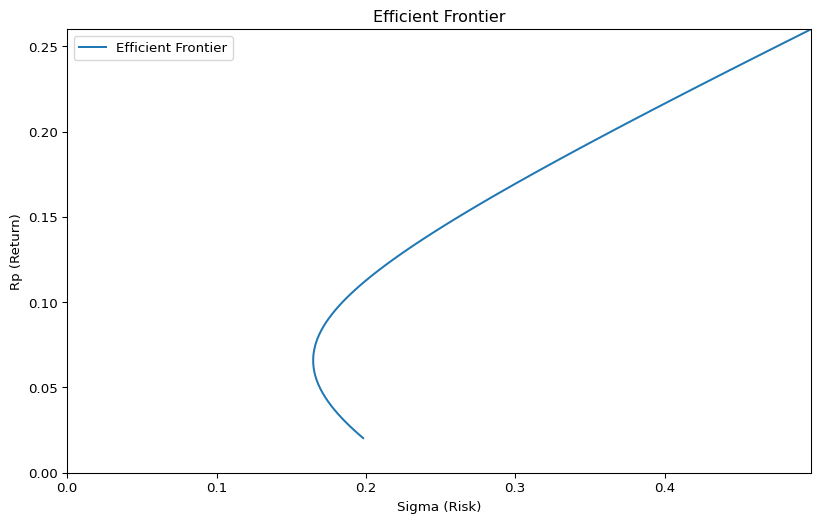

In [19]:
from matplotlib import pyplot as plt
#Creating plot
fig, ax = plt.subplots(figsize=(10, 6))
plot_scale = 52
MAX_AXIS = 0.005
#applying the function
rp_values = np.linspace(0, MAX_AXIS-rf, 100)
sigma_values = portfolio_front(rp_values, A, B, C)

#plotting, after annualizing the weekly data
ax.plot(plot_scale**0.5*(sigma_values), 
            plot_scale*(rp_values+rf), 
            label='Efficient Frontier')

#plot settings:
ax.set_xlim([0, np.max(sigma_values*plot_scale**0.5)])
ax.set_ylim([0, (np.max(rp_values)+rf)*plot_scale])
ax.set_xlabel('Sigma (Risk)')
ax.set_ylabel('Rp (Return)')
ax.set_title('Efficient Frontier')
ax.legend()

A key advantage of using log returns is that they account for symmetry
in gains and losses. For example, with relative returns, a 10% gain
followed by a 10% loss results in a net loss of 1%. However, with log
returns, a 10% gain and a 10% loss precisely offset each other, leaving
you with no net change from the starting point.

## Adding the optimal portfolio to the chart

Let us now add the point for the optimal portfolio. The optimal
portfolio is

<span id="eq-opt_port_sol2">$$
\mathbf{a}_{opt} = \frac{1}{\lambda}{\Sigma}^{-1}({\mu} - \mathbf{1}r)
 \qquad(26)$$</span>

The total cost (sum) of this portfolio is <span id="eq-sum_eq">$$
\mathbf{1}^{\prime}\mathbf{a}_{opt} = \frac{1}{\lambda} \mathbf{1}^{\prime}{\Sigma}^{-1}({\mu} - \mathbf{1}r) = B
 \qquad(27)$$</span>

Where the last equality follows from Equation . The normalized optimal
portfolio is then

<span id="eq-norm_opt">$$
\mathbf{a}_{norm}  = \frac{ {\Sigma}^{-1}({\mu} - \mathbf{1}r) }
{ \mathbf{1}^{\prime}{\Sigma}^{-1}({\mu} - \mathbf{1}r)} = \frac{ 1 }
{B}{\Sigma}^{-1}({\mu} - \mathbf{1}r)
 \qquad(28)$$</span>

The expected return of the optimal portfolio on the frontier, is then

<span id="eq-opt_port_sol_exp_ret">$$
\mu_{port}=({\mu} - \mathbf{1}r)^{\prime}\mathbf{a_{norm}}  = \frac{({\mu} - \mathbf{1}r)^{\prime}{\Sigma}^{-1}({\mu} - \mathbf{1}r)}{ \mathbf{1}^{\prime}{\Sigma}^{-1}({\mu} - \mathbf{1}r)} 
 \qquad(29)$$</span>

Which is simply, according to the previous definitions of B and C:
<span id="eq-opt_port_sol_exp_ret_simple">$$
\mu_{port}=\frac{C}{B}
 \qquad(30)$$</span>

Let us add that to the plot

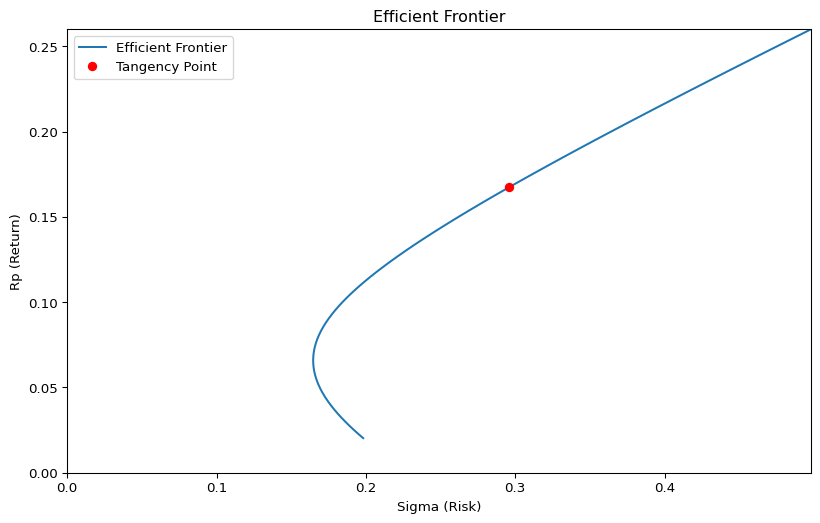

In [20]:
# Calculating the tangency point of the normalized 
# optimal portfolio
tangency_sigma =  portfolio_front(C/B, A, B, C)

#plotting it, after annualizing the weekly data
ax.plot(plot_scale**0.5*tangency_sigma, 
                    plot_scale*(C/B + rf), 
                    'ro',label='Tangency Point')
ax.legend()
fig

## Adding the tangency line

Let us now draw a tangency line from the risk free interest rate `rf` to
the optimal portfolio point. The slope will be the Sharp-ratio (Sharpe
1964)

<span id="eq-opt_port_sol_sharpe">$$
S=\frac{C/B}{f(C/B)}
 \qquad(31)$$</span>

where $f(C/B)$ is the portfolio front function
`portfolio_front(C/B, A, B, C)` at `C/B`

In [21]:
sigma_range = np.linspace(0, np.max(sigma_values), 100)

# Plotting the portfolio front, after annualizing the 
# weekly data
ax.plot(plot_scale**0.5*sigma_range, plot_scale*(rf 
                + sigma_range*(C/B)/tangency_sigma), 
                color='r', linestyle='--', 
                label='Capital Market Line')

ax.legend()

fig

<a href="#fig-cml" class="quarto-xref">Figure 1</a> illustrates the
concept of the separation theorem as described by Tobin (1958). Once the
optimal portfolio is identified, it can be combined with a risk-free
asset, allowing the investor to choose any point on the red capital
allocation line.

The optimal portfolio represents the tangency point of this line with
the portfolio front. Investors cannot select any asset above or to the
left of the portfolio front, as such positions are not feasible. Any
point within the front is considered inefficient, as better trade-offs
between risk and return are attainable. The capital allocation line,
therefore, must begin at the risk-free return and have the steepest
possible slope while touching the portfolio front, as depicted in
<a href="#fig-cml" class="quarto-xref">Figure 1</a>.

## Adding the stocks spanning the portfolio front

It is interesting to check where the original stocks that span the
front, are in the picture. Let us add the cooridnates of these. We first
calcualate their mean and standard devaition, and then plot them.

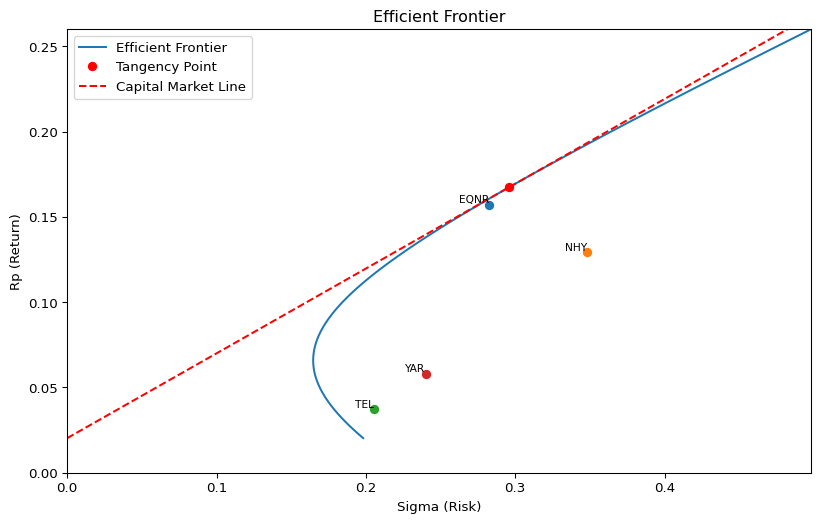

In [22]:
expected = X_df.mean()*52
std = X_df.std()*52**0.5


for series in expected.index:
        ax.scatter(std[series], expected[series], label=series)
        ax.text(std[series], expected[series], series, fontsize=8, ha='right', va='bottom')

fig

## The optimal portfolio

Finally, we might want to evaluate the actual amounts that we should
invest in each company, if we wanted to invest in the optimal portfolio.
The actual portfolio, normalized to sum to one, is as previously implied

<span id="eq-opt_port_sol_norm2">$$
\mathbf{a}_{norm}  = \frac{1}
{B} {\Sigma}^{-1}({\mu} - \mathbf{1}r) 
 \qquad(32)$$</span>

where $B$ is the sum of the optimal portfolio, as previously defined in

We can code that as

In [23]:
#Calculating the normalized optimal portfolio
opt_port = np.linalg.inv(cov_matrix) @ (means-rf)/B

#Calculating the returns of the optimal portfolio:
X_df['Optimal'] = X @ opt_port

#Saving the dataframe for later use:
pd.to_pickle(X_df, 'output/X.df')

# inserting the portfolio into a data frame for display
d = {}
for i in range(len(opt_port)):
    d[X_df.columns[i]] = [
            f"{np.round(opt_port[i][0]*100,0)}%"
        ]

print("Hence the optimal portfolio in this case is")
pd.DataFrame(d)

Hence the optimal portfolio in this case is

***Coding Challenges:***

-   **Challenge 1**: Obtain a three or four time series with asset
    returns, and calculate the variance-covariance matrix and the means

-   **Challenge 2**: Use your calculated covariance matrix and means,
    and the code provided above, to draw a portfolio front.

-   **Challenge 3**: Use the same information to plot the points of each
    portfolio in the same chart.

-   **Challenge 4**: Calculate the optimal portfolio and place it in the
    chart, together with the capital market line

# Literature

Cayley, Arthur. 1858. “A Memoir on the Theory of Matrices.”
*Philosophical Transactions of the Royal Society of London* 148: 17–37.
<https://doi.org/10.1098/rstl.1858.0002>.

Markowitz, Harry. 1952. “Portfolio Selection.” *The Journal of Finance*
7 (1): 77–91. <https://doi.org/10.2307/2975974>.

Sharpe, William F. 1964. “Capital Asset Prices: A Theory of Market
Equilibrium Under Conditions of Risk.” *The Journal of Finance* 19 (3):
425–42. <https://doi.org/10.2307/2977928>.

Tobin, James. 1958. “Liquidity Preference as Behavior Towards Risk.”
*The Review of Economic Studies* 25 (2): 65–86.
<https://doi.org/10.2307/2296205>.